## This is the 2-layer neural network workbook for ECE 239AS Assignment #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a two layer neural network.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass

In [2]:
from nndl.neural_net import TwoLayerNet

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [4]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231233889892e-08


### Forward pass loss

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print("Loss:",loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Loss: 1.071696123862817
Difference between your loss and correct loss:
0.0


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [6]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 1.2832874456864775e-09
W2 max relative error: 2.9632227682005116e-10
b1 max relative error: 3.1726806716844575e-09
b2 max relative error: 1.2482660547101085e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.020371427168192163


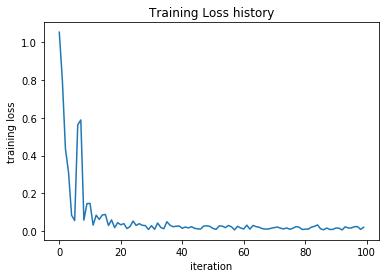

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [8]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.302737768195894
iteration 100 / 1000: loss 2.302210525699118
iteration 200 / 1000: loss 2.2964000486596787
iteration 300 / 1000: loss 2.2688397683134354
iteration 400 / 1000: loss 2.2252579375820387
iteration 500 / 1000: loss 2.153736317283182
iteration 600 / 1000: loss 2.0755138768138344
iteration 700 / 1000: loss 2.021773289161574
iteration 800 / 1000: loss 1.9611502427393566
iteration 900 / 1000: loss 1.9224467427616605
Validation accuracy:  0.282


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [10]:
stats['train_acc_history']

[0.1, 0.165, 0.175, 0.275, 0.26]

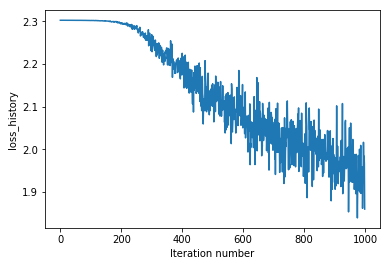

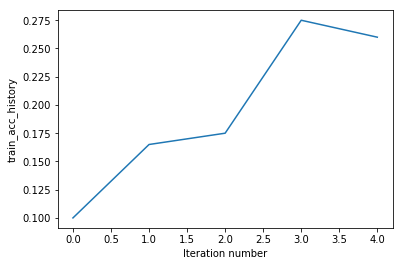

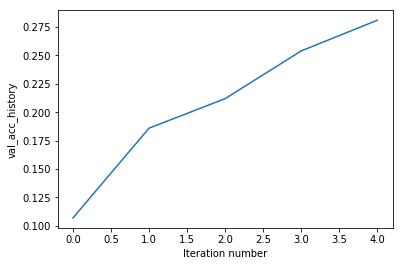

In [11]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies

for key in stats.keys():
    plt.plot(stats[key])
    plt.xlabel('Iteration number')
    plt.ylabel(key)
    plt.show()
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) The training accuracy isn't that high because at first, our learning rate is too low. We spend about 200 iterations before learning really begins. Later on, our learning rate becomes too large because we oscillate and overshoot when correcting opposite the direction of the calculated gradient. This results in very jagged and erratic shape of the curve near the end.

(2) We could fix the problems in (1) by starting with a high learning rate and reducing it as the number of iterations increases. This was the learning rate decays with the number of iterations.

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

iteration 0 / 2000: loss 2.3027804118391284
iteration 100 / 2000: loss 1.8668156638166011
iteration 200 / 2000: loss 1.8430086531721563
iteration 300 / 2000: loss 1.7383488442685355
iteration 400 / 2000: loss 1.6649546732855052
iteration 500 / 2000: loss 1.6678872937868663
iteration 600 / 2000: loss 1.6810578926396986
iteration 700 / 2000: loss 1.648596158491729
iteration 800 / 2000: loss 1.647581179462494
iteration 900 / 2000: loss 1.56091577351718
iteration 1000 / 2000: loss 1.3991335430614051
iteration 1100 / 2000: loss 1.5257115809344948
iteration 1200 / 2000: loss 1.3475706963187508
iteration 1300 / 2000: loss 1.4261768799740546
iteration 1400 / 2000: loss 1.366151794941321
iteration 1500 / 2000: loss 1.356201397366969
iteration 1600 / 2000: loss 1.4026653372857016
iteration 1700 / 2000: loss 1.3112695062167443
iteration 1800 / 2000: loss 1.4300036396669753
iteration 1900 / 2000: loss 1.4909134185659503


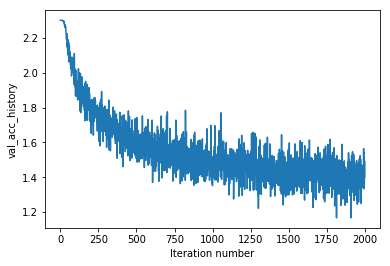

Learning Rate: 0.001	Learning Rate Decay: 0.91	Validation accuracy: 0.503
iteration 0 / 2000: loss 2.302762432551239
iteration 100 / 2000: loss 2.090125474573495
iteration 200 / 2000: loss 1.7516840474010371
iteration 300 / 2000: loss 1.7529236039040272
iteration 400 / 2000: loss 1.7105149949855605
iteration 500 / 2000: loss 1.443193211540268
iteration 600 / 2000: loss 1.4782990456970906
iteration 700 / 2000: loss 1.4887981498825826
iteration 800 / 2000: loss 1.50064647383474
iteration 900 / 2000: loss 1.6247214346331889
iteration 1000 / 2000: loss 1.442743850699887
iteration 1100 / 2000: loss 1.4334798776958155
iteration 1200 / 2000: loss 1.4734324867940414
iteration 1300 / 2000: loss 1.5538681055209693
iteration 1400 / 2000: loss 1.427930281106316
iteration 1500 / 2000: loss 1.3945370032565312
iteration 1600 / 2000: loss 1.4620028647125196
iteration 1700 / 2000: loss 1.431605745589837
iteration 1800 / 2000: loss 1.5250305573719767
iteration 1900 / 2000: loss 1.3993411282599564


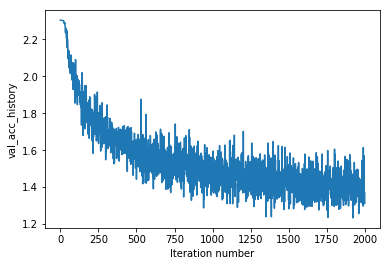

Learning Rate: 0.001	Learning Rate Decay: 0.92	Validation accuracy: 0.493
iteration 0 / 2000: loss 2.3027701127869586
iteration 100 / 2000: loss 2.0365259460384517
iteration 200 / 2000: loss 1.7401983360660642
iteration 300 / 2000: loss 1.7138604618602784
iteration 400 / 2000: loss 1.5708812134836674
iteration 500 / 2000: loss 1.6836654025911708
iteration 600 / 2000: loss 1.5793615608775522
iteration 700 / 2000: loss 1.4787913760689628
iteration 800 / 2000: loss 1.608825624351041
iteration 900 / 2000: loss 1.5851612717024626
iteration 1000 / 2000: loss 1.346479469167854
iteration 1100 / 2000: loss 1.398740476098411
iteration 1200 / 2000: loss 1.3775242026910473
iteration 1300 / 2000: loss 1.5191966790089662
iteration 1400 / 2000: loss 1.3924856511939363
iteration 1500 / 2000: loss 1.465793160837721
iteration 1600 / 2000: loss 1.417141302655865
iteration 1700 / 2000: loss 1.3294621533271065
iteration 1800 / 2000: loss 1.3650333139611441
iteration 1900 / 2000: loss 1.3691928043000172


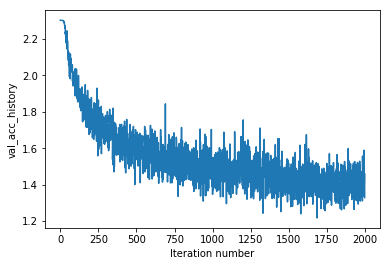

Learning Rate: 0.001	Learning Rate Decay: 0.93	Validation accuracy: 0.501
iteration 0 / 2000: loss 2.3027925355763155
iteration 100 / 2000: loss 1.9388521509344385
iteration 200 / 2000: loss 1.811747387792229
iteration 300 / 2000: loss 1.7658574232714217
iteration 400 / 2000: loss 1.5422363159746386
iteration 500 / 2000: loss 1.584662486625835
iteration 600 / 2000: loss 1.4884737974362234
iteration 700 / 2000: loss 1.5914480031891176
iteration 800 / 2000: loss 1.643240187243249
iteration 900 / 2000: loss 1.3870529390979809
iteration 1000 / 2000: loss 1.5571359600820673
iteration 1100 / 2000: loss 1.55746218767347
iteration 1200 / 2000: loss 1.4066917872330995
iteration 1300 / 2000: loss 1.5222802342582449
iteration 1400 / 2000: loss 1.398935773059015
iteration 1500 / 2000: loss 1.3844006349592874
iteration 1600 / 2000: loss 1.3600156454022891
iteration 1700 / 2000: loss 1.3684951492305415
iteration 1800 / 2000: loss 1.465088293407564
iteration 1900 / 2000: loss 1.4281562907224001


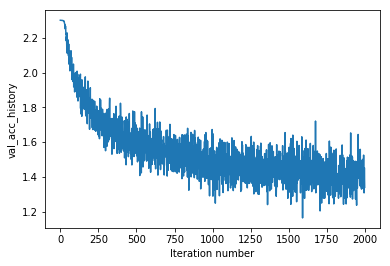

Learning Rate: 0.001	Learning Rate Decay: 0.94	Validation accuracy: 0.493
iteration 0 / 2000: loss 2.302782182288145
iteration 100 / 2000: loss 1.9784864953635706
iteration 200 / 2000: loss 1.8458695441383326
iteration 300 / 2000: loss 1.6400805761513173
iteration 400 / 2000: loss 1.5653173154987259
iteration 500 / 2000: loss 1.5540762442993181
iteration 600 / 2000: loss 1.4766058922630914
iteration 700 / 2000: loss 1.6990913642047776
iteration 800 / 2000: loss 1.4220396766053045
iteration 900 / 2000: loss 1.467766147044856
iteration 1000 / 2000: loss 1.6856558448033874
iteration 1100 / 2000: loss 1.4586234737643862
iteration 1200 / 2000: loss 1.5175896456882345
iteration 1300 / 2000: loss 1.5267291481315273
iteration 1400 / 2000: loss 1.5015197700898288
iteration 1500 / 2000: loss 1.3957633533506033
iteration 1600 / 2000: loss 1.367857299843778
iteration 1700 / 2000: loss 1.5487219933399776
iteration 1800 / 2000: loss 1.3244137292247233
iteration 1900 / 2000: loss 1.3501146611429828


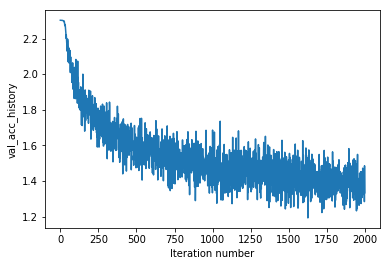

Learning Rate: 0.001	Learning Rate Decay: 0.95	Validation accuracy: 0.485
iteration 0 / 2000: loss 2.3027756395273533
iteration 100 / 2000: loss 1.8808312243373928
iteration 200 / 2000: loss 1.7469685616391022
iteration 300 / 2000: loss 1.5571602629300905
iteration 400 / 2000: loss 1.5701212519046375
iteration 500 / 2000: loss 1.6743666219885296
iteration 600 / 2000: loss 1.524858663977657
iteration 700 / 2000: loss 1.739968067112269
iteration 800 / 2000: loss 1.527033891781227
iteration 900 / 2000: loss 1.4901713255083546
iteration 1000 / 2000: loss 1.4813858062363354
iteration 1100 / 2000: loss 1.5509803084578941
iteration 1200 / 2000: loss 1.4126309334398202
iteration 1300 / 2000: loss 1.4374362148412168
iteration 1400 / 2000: loss 1.5192282032297466
iteration 1500 / 2000: loss 1.4465842115168002
iteration 1600 / 2000: loss 1.6124303108450317
iteration 1700 / 2000: loss 1.3441959603772577
iteration 1800 / 2000: loss 1.5107118523526042
iteration 1900 / 2000: loss 1.3082665675516714


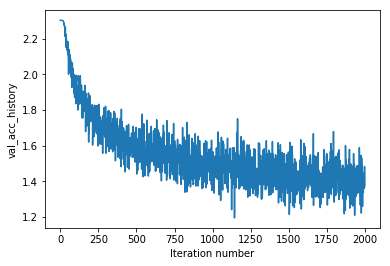

Learning Rate: 0.001	Learning Rate Decay: 0.96	Validation accuracy: 0.505
iteration 0 / 2000: loss 2.3027732107858454
iteration 100 / 2000: loss 2.0264864712203146
iteration 200 / 2000: loss 1.7995947241006527
iteration 300 / 2000: loss 1.6787570427398102
iteration 400 / 2000: loss 1.6555270915720606
iteration 500 / 2000: loss 1.5555217558587582
iteration 600 / 2000: loss 1.5206628757095015
iteration 700 / 2000: loss 1.656806996928589
iteration 800 / 2000: loss 1.5324954827365673
iteration 900 / 2000: loss 1.4101127793941057
iteration 1000 / 2000: loss 1.3770866391684613
iteration 1100 / 2000: loss 1.5253955445096887
iteration 1200 / 2000: loss 1.4770156872923477
iteration 1300 / 2000: loss 1.4728935332190383
iteration 1400 / 2000: loss 1.458066889325177
iteration 1500 / 2000: loss 1.4504821965388035
iteration 1600 / 2000: loss 1.5192390711279666
iteration 1700 / 2000: loss 1.4977341507311894
iteration 1800 / 2000: loss 1.390882206209512
iteration 1900 / 2000: loss 1.4397496098898097


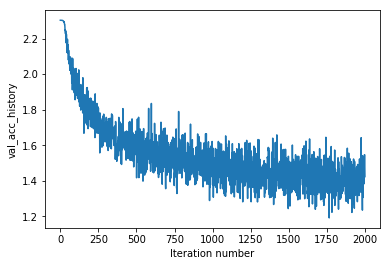

Learning Rate: 0.001	Learning Rate Decay: 0.97	Validation accuracy: 0.496
iteration 0 / 2000: loss 2.3027686856982137
iteration 100 / 2000: loss 1.926635312602469
iteration 200 / 2000: loss 1.714020598818626
iteration 300 / 2000: loss 1.779263672347851
iteration 400 / 2000: loss 1.5269591615950742
iteration 500 / 2000: loss 1.6116283405137841
iteration 600 / 2000: loss 1.504498852101504
iteration 700 / 2000: loss 1.6425107742852143
iteration 800 / 2000: loss 1.5774636998955582
iteration 900 / 2000: loss 1.4754587135424067
iteration 1000 / 2000: loss 1.507876005392547
iteration 1100 / 2000: loss 1.3992747128496197
iteration 1200 / 2000: loss 1.3957367274146906
iteration 1300 / 2000: loss 1.376465970449571
iteration 1400 / 2000: loss 1.4332054029860106
iteration 1500 / 2000: loss 1.5149285180259817
iteration 1600 / 2000: loss 1.4049646936431988
iteration 1700 / 2000: loss 1.5060763153957832
iteration 1800 / 2000: loss 1.4077397593375576
iteration 1900 / 2000: loss 1.4948861555138315


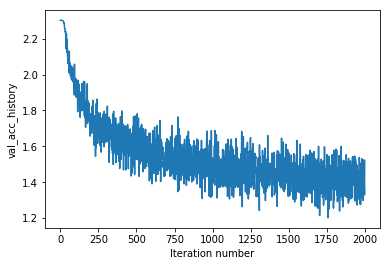

Learning Rate: 0.001	Learning Rate Decay: 0.98	Validation accuracy: 0.512
iteration 0 / 2000: loss 2.3027953292186245
iteration 100 / 2000: loss 1.8983294766922443
iteration 200 / 2000: loss 1.7701232749924918
iteration 300 / 2000: loss 1.7377596499372456
iteration 400 / 2000: loss 1.5578501408883165
iteration 500 / 2000: loss 1.5464362747809886
iteration 600 / 2000: loss 1.6116277987313112
iteration 700 / 2000: loss 1.5337484462270166
iteration 800 / 2000: loss 1.5263500909104182
iteration 900 / 2000: loss 1.4844730745799775
iteration 1000 / 2000: loss 1.466052543708705
iteration 1100 / 2000: loss 1.4167042594353854
iteration 1200 / 2000: loss 1.410475211808445
iteration 1300 / 2000: loss 1.4259397038784425
iteration 1400 / 2000: loss 1.5408381756480263
iteration 1500 / 2000: loss 1.4048558996308913
iteration 1600 / 2000: loss 1.3624421722067974
iteration 1700 / 2000: loss 1.34889742347605
iteration 1800 / 2000: loss 1.4283384584120375
iteration 1900 / 2000: loss 1.3220200327420606


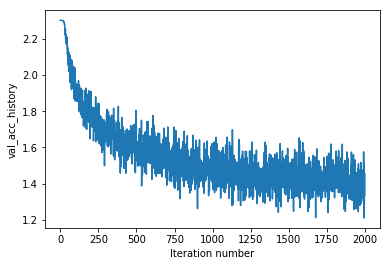

Learning Rate: 0.001	Learning Rate Decay: 0.99	Validation accuracy: 0.512
Validation accuracy:  0.512


In [12]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #
np.random.seed(1)

largest_validation_accuracy = 0

# first iteration: try large spread of learning rates and learning decay rates
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
learning_decay_rates= [1, 0.9999, 0.999, 0.99, 0.97, 0.95, 0.9]
num_iterations = 1000
# best result:
# Learning Rate: 0.001
# Learning Rate Decay: 0.99
# Validation accuracy: 0.48

# second iteration: use learning rate 0.001 and 2000 iterations instead of 1000, try different learning rate decays
learning_rates = [0.001]
learning_decay_rates = [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
num_iterations = 2000
# best result:
# Learning Rate Decay: 0.99
# Validation accuracy: 0.512
# it looks like using more iterations improved accuracy

for lr in learning_rates:
    for lr_decay in learning_decay_rates:
        current_net = TwoLayerNet(input_size, hidden_size, num_classes)
        
        stats = current_net.train(X_train, y_train, X_val, y_val,
                    num_iters=num_iterations, batch_size=200,
                    learning_rate=lr, learning_rate_decay=lr_decay,
                    reg=0.25, verbose=True)
        plt.plot(stats['loss_history'])
        plt.xlabel('Iteration number')
        plt.ylabel(key)
        plt.show()
        val_acc = (current_net.predict(X_val) == y_val).mean()
        if val_acc > largest_validation_accuracy:
            best_net = current_net
        print(f"Learning Rate: {lr}\tLearning Rate Decay: {lr_decay}\tValidation accuracy: {val_acc}")


# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

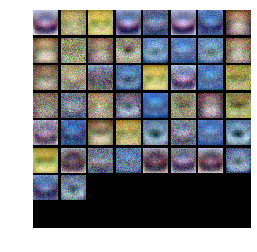

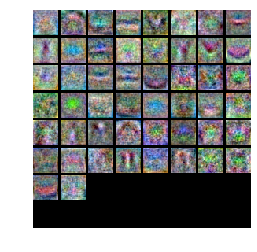

In [13]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) The suboptimal neural network has weights that are relatively homogeneous because the visualization for the the different weights appear similarly circular. The best net has weights that are more varied because the visualizations look different from each other and have different shapes.

## Evaluate on test set 

In [14]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.476
